## 모듈

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
D=pd.read_excel("https://data.hossam.kr/D02/wage.xlsx")
data=pd.DataFrame(D)

### 데이터 확인

In [4]:
D.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
step1=pd.DataFrame(data.dtypes)
step1.reset_index(inplace=True)
step1.rename(columns={
    "index":"col_name",
    0:"type"
},inplace=True)

#### 1. 범주형 컬럼 확인

In [8]:
cols=list(step1.loc[step1["type"]=="object"]["col_name"])

범주 개수 확인

In [9]:
rg=[]
for col in cols:
    rg.append(data[col].nunique())

In [11]:
info=pd.DataFrame(index=range(1,max(rg)+1),columns=cols)

In [12]:
info

,maritl,race,education,region,jobclass,health,health_ins
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>한번에 가자

In [13]:
for col in cols:
    data[col]=data[col].apply(lambda x: (int(x.split(".")[0]),x.split(".")[1].strip()))

>info table 만들어놓기

In [75]:
for col in cols:
    for dt in data[col].unique():
        info.loc[dt[0]][col]=dt[1]

In [76]:
info

,maritl,race,education,region,jobclass,health,health_ins
1,Never Married,White,< HS Grad,NaN,Industrial,<=Good,Yes
2,Married,Black,HS Grad,Middle Atlantic,Information,>=Very Good,No
3,Widowed,Asian,Some College,NaN,NaN,NaN,NaN
4,Divorced,Other,College Grad,NaN,NaN,NaN,NaN
5,Separated,NaN,Advanced Degree,NaN,NaN,NaN,NaN


In [77]:
for col in cols:
    data[col]=data[col].apply(lambda x:x[0])

In [78]:
data[cols]=data[cols].astype("category") #카테고리 형으로 완료.

#### 문제3.

이상치 확인

In [79]:
q1=data[data.columns.difference(cols)].quantile(0.25)
q3=data[data.columns.difference(cols)].quantile(0.75)
iqr=q3-q1

In [80]:
iq_range=pd.DataFrame(index=q1.index,columns=["min","max"])
iq_range["min"]=q1-1.5*iqr
iq_range["max"]=q3+1.5*iqr

In [81]:
iq_range

,min,max
age,7.875000,76.875000
logwage,3.831896,5.472594
wage,20.439119,193.625310
year,1998.000000,2014.000000


In [82]:
for col in iq_range.index:
    data=data[data[col]<iq_range.loc[col,"max"]]
    data=data[data[col]>iq_range.loc[col,"min"]]    

In [83]:
data.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [84]:
for col in iq_range.index:
   idx=data[(data[col]<iq_range.loc[col]["min"])|(data[col]>iq_range.loc[col]["max"])][col].index
   data.loc[idx,col]=np.nan

#### 이상치 확인 및 소거
> 3000개의 데이터에서 nan값을 삭제해도 충분하다고 충분하다고 판단

In [85]:
data.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [86]:
data.dropna(inplace=True)

In [87]:
pd.DataFrame(data[data.columns.difference(cols)].describe()).T

,count,mean,std,min,25%,50%,75%,max
age,2839.0,42.311729,11.408074,18.000000,33.000000,42.000000,50.000000,76.000000
logwage,2839.0,4.638864,0.279616,3.836577,4.447158,4.653213,4.845098,5.265033
wage,2839.0,107.458413,29.489706,46.366503,85.383940,104.921507,127.115744,193.452607
year,2839.0,2005.796759,2.019438,2003.000000,2004.000000,2006.000000,2008.000000,2009.000000


기술통계
1. 이상치 제거 후 총 2839개의 데이터
2. 각  column이 중앙값과 평균값의 차이가 크지않다. 즉 정규분포를 따를 확률이 높다.
3. 이상치는 나이에서 5, 임금(로그값,원값) 둘의 이상치가 각각 126,110 이다.

#### 문제 4.

In [88]:
cols

['maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']

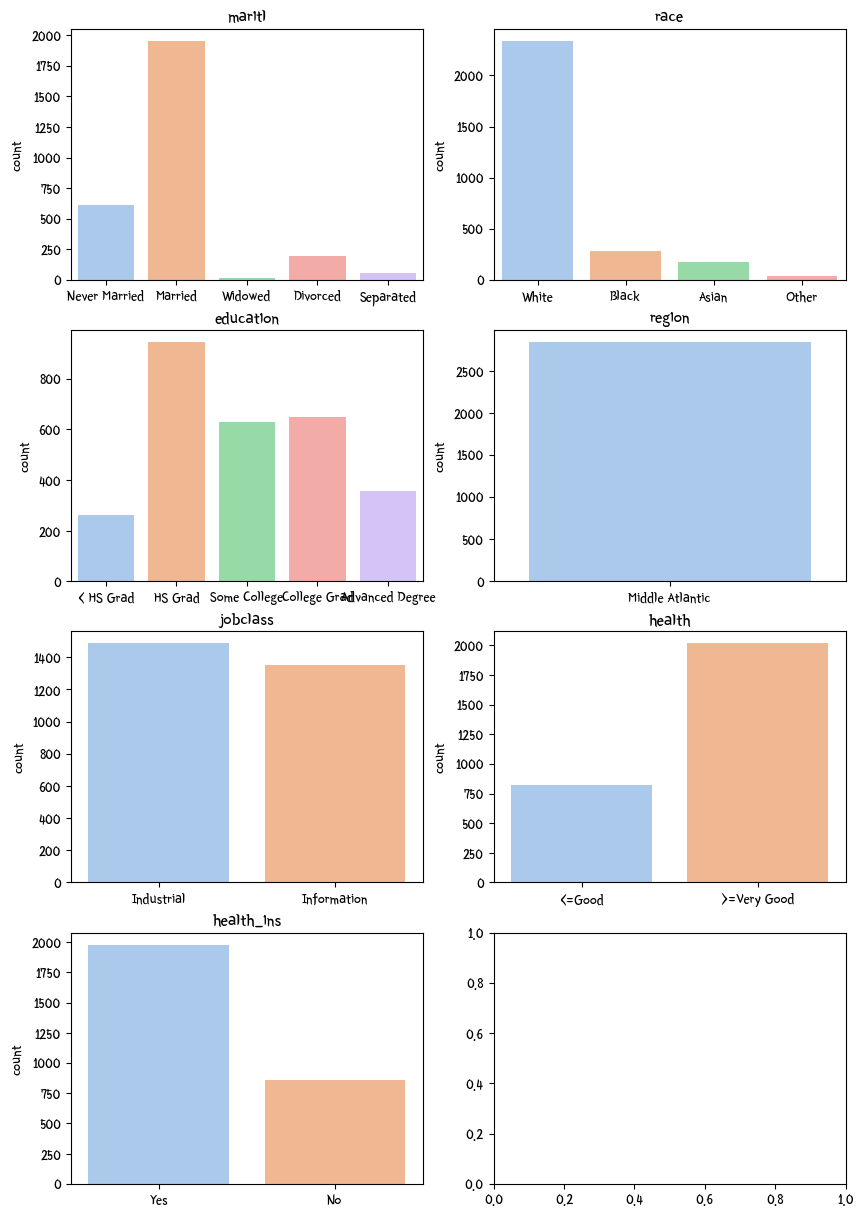

In [100]:
plt.rcParams["figure.figsize"] = (10, 15)
fig,ax=plt.subplots(4,2)
dct=dict(zip(cols,sum([[ax[i][j] for j in range(2)] for i in range(4)],[])))
for key in dct:
    sb.countplot(ax=dct[key],
        data=data,
        x=key,
        palette="pastel"
    )
    dct[key].title.set_text(key)
    dct[key].set_xlabel(None)
    dct[key].set_xticks(dct[key].get_xticks(),info[key].dropna())

기술통계
1. 백인위주의 한지역에서 조사한 조사결과이다.
2. 비교적 건강한 사람의 비율이 더 높다.
3. 직업별 인구수의 차이는 크지않으며, 고등교육 이상의 학력자가 많다.

In [101]:
cols

['maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']

In [104]:
data5=data.filter(['maritl',"wage"])

In [105]:
data5['maritl'].values.categories

[1, 1, 2, 2, 4, ..., 2, 2, 2, 1, 5]
Length: 2839
Categories (5, int64): [1, 2, 3, 4, 5]

In [109]:
data5[data['maritl']==1]

,maritl,wage
0,1,75.043154
1,1,70.476020
7,1,111.720849
8,1,118.884359
12,1,89.492480
...,...,...
2972,1,87.981033
2976,1,59.097064
2989,1,148.413159
2991,1,118.884359


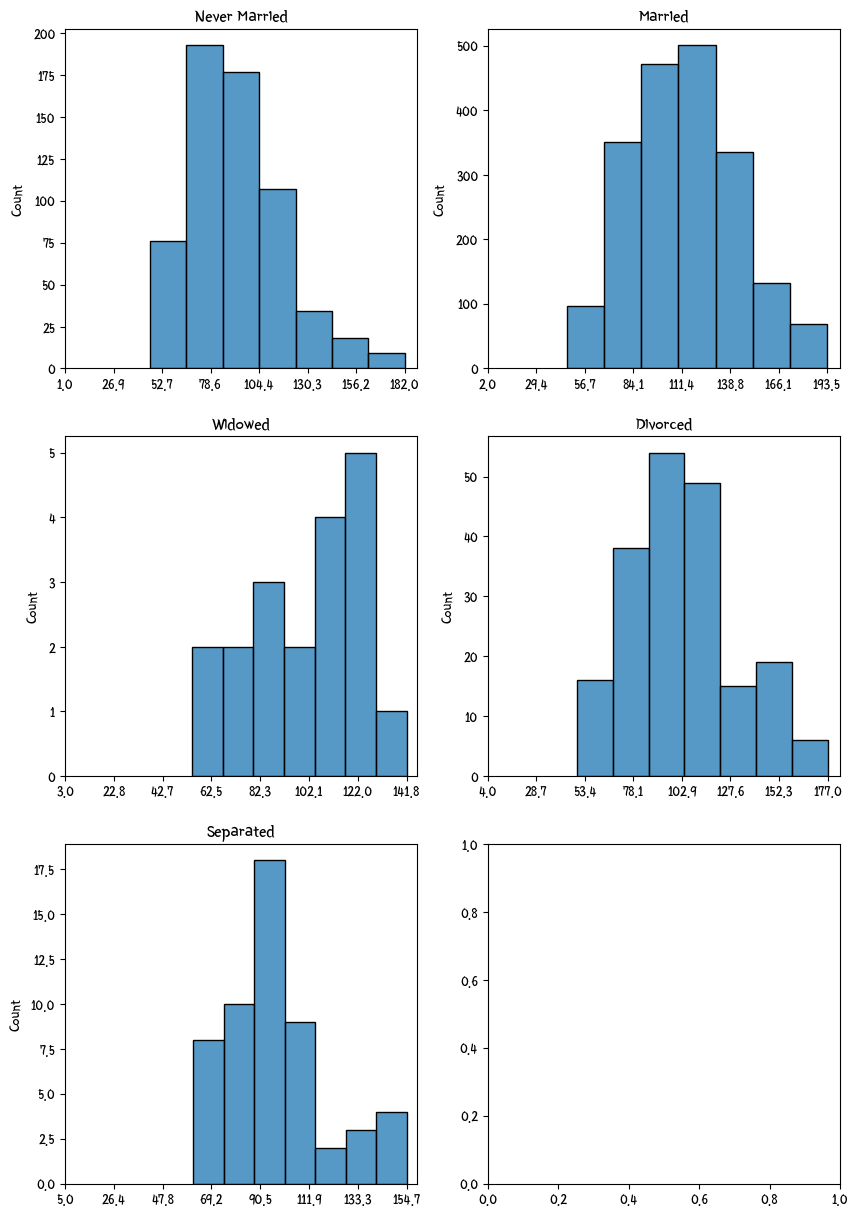

In [131]:
plt.rcParams["figure.figsize"] = (10, 15)
fig,ax=plt.subplots(3,2)
dct=dict(zip(data5['maritl'].values.categories,sum([[ax[i][j] for j in range(2)] for i in range(3)],[])))
for key in dct:
    x,y=np.histogram(data5[data['maritl']==key],7)
    sb.histplot(ax=dct[key],
        data=data5[data['maritl']==key],
        x="wage",
        bins=7
    )
    dct[key].title.set_text(info["maritl"].loc[key])
    dct[key].set_xlabel(None)
    dct[key].set_xticks(list(y))
    # dct[key].set_xlabel(None)
    # dct[key].set_xticks(dct[key].get_xticks(),info[key].dropna())
plt.show()

In [122]:
np.histogram([data['maritl']==5],7)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_27512\3764663321.py:1: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  np.histogram([data['maritl']==5],7)


(array([2785,    0,    0,    0,    0,    0,   54], dtype=int64),
 array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]))

In [121]:
dct

{1: <Axes: title={'center': 'Never Married'}, xlabel='wage', ylabel='Count'>,
 2: <Axes: title={'center': 'Married'}, xlabel='wage', ylabel='Count'>,
 3: <Axes: title={'center': 'Widowed'}, xlabel='wage', ylabel='Count'>,
 4: <Axes: title={'center': 'Divorced'}, xlabel='wage', ylabel='Count'>,
 5: <Axes: title={'center': 'Separated'}, xlabel='wage', ylabel='Count'>}